# Naive Bayes Modelo

In [1]:
import pandas as pd
import preprocessing as pp
import formatPredictions as fp
import metrics as m
import datasets as datasets

# Importacion Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Importacion preprocesamiento
from sklearn.model_selection import train_test_split

In [2]:
# Divido el set en entrenamiento y validacion
def getSetEntrenamientoYTest():
  dfTrain = datasets.getDataTrain()
  dfTrain_feature_engineering = pp.feature_engineering_KNN_SVM_Naive_Bayes(dfTrain)
  X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
  y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
  return X_train, X_test, y_train, y_test

# Entrenamiento aplicando Gaussian 

In [3]:
X_train, X_test, y_train, y_test = getSetEntrenamientoYTest()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Metricas

Accuracy: 0.7941040994933211

Precision: 0.5518535898639136

Recall: 0.8071096748131691

F1 Score: 0.6368805848903332

Matriz de confusion: 
[[3996  955]
 [ 386 1176]]

AUC-ROC: 



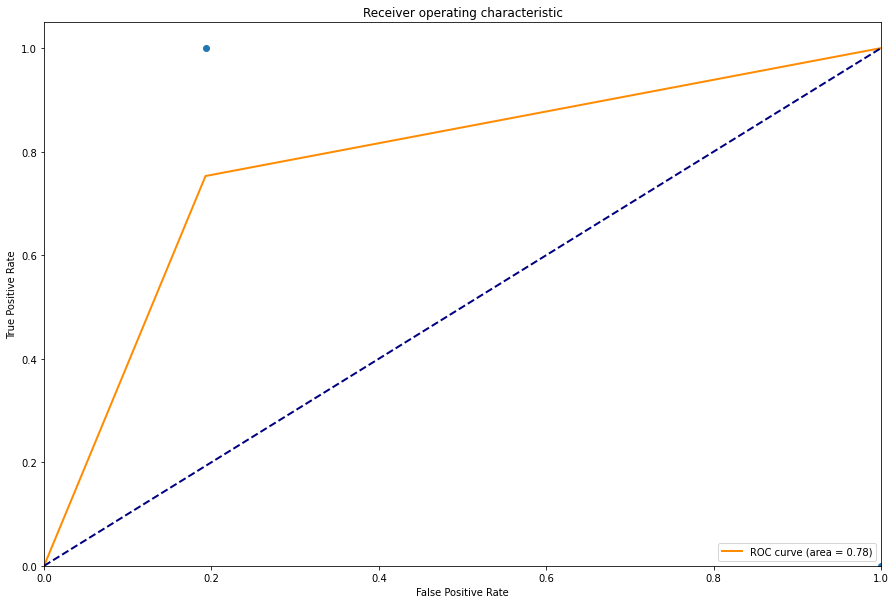

0.7799952983540878

In [4]:
m.metrics(y_test, y_pred)

# Prediccion

In [5]:
# Obtengo el set para predecir
dfObjetivo = datasets.getDataValidation()

# Elimino columnas "representatividad_poblacional" y "id"
dfObjetivo.drop(columns = ['representatividad_poblacional', 'id'], inplace = True)

# Aplico feature engineering
dfObjetivo_feature_engineering = pp.feature_engineering_KNN_SVM_Naive_Bayes(dfObjetivo)

predicciones = gnb.predict(dfObjetivo_feature_engineering)
predicciones

array([0, 1, 1, ..., 1, 1, 1])

In [6]:
fp.exportPredictions(fp.formatPredictions(predicciones), "pd_predictions_final_naive_bayes_gaussian")

# Entrenamiento aplicando Multinomial

In [7]:
X_train, X_test, y_train, y_test = getSetEntrenamientoYTest()
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

# Metricas

Accuracy: 0.7451251343466913

Precision: 0.4728682170542636

Recall: 0.7276186661325856

F1 Score: 0.5951219512195122

Matriz de confusion: 
[[3633 1360]
 [ 300 1220]]

AUC-ROC: 



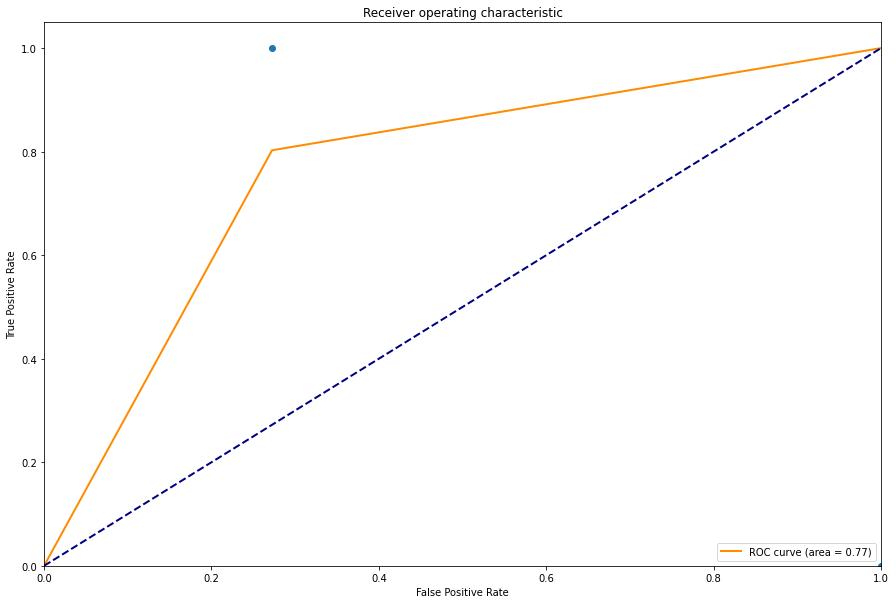

0.7651251225399771

In [8]:
m.metrics(y_test, y_pred)

# Prediccion

In [9]:
# Obtengo el set para predecir
dfObjetivo = datasets.getDataValidation()

# Elimino columnas "representatividad_poblacional" y "id"
dfObjetivo.drop(columns = ['representatividad_poblacional', 'id'], inplace = True)

# Aplico feature engineering
dfObjetivo_feature_engineering = pp.feature_engineering_KNN_SVM_Naive_Bayes(dfObjetivo)

predicciones = mnb.predict(dfObjetivo_feature_engineering)
predicciones

array([0, 1, 1, ..., 1, 1, 1])

In [10]:
fp.exportPredictions(fp.formatPredictions(predicciones), "pd_predictions_final_naive_bayes_multinomial")